## Part A: Exploratory Data Analysis (20 marks)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

from IPython.display import display
from collections import Counter

## 1. Load and Explore Dataset

In [2]:
df = pd.read_csv('../data/zomato_df_final_data.csv')
display(df.head())
print('\nDataset dimensions:', df.shape)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b



Dataset dimensions: (10500, 17)


### 1.1. Data Types

In [3]:
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

### 1.2. Summary Statistics

In [4]:
df.describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


The dataset contains 10,154 observations for most variables, though only 7,184 entries are available for rating_number and votes. The mean restaurant cost (cost) is approximately 51 AUD with a standard deviation of 27.8, ranging from 8 to 500 AUD. Latitude (lat) values average –32.9 with a standard deviation of 8.26, while longitude (lng) averages 148.9 with a standard deviation of 26.7. The mean rating (rating_number) is 3.28 with a standard deviation of 0.45, ranging between 1.8 and 4.9. The number of votes (votes) has a mean of 83.6 and a standard deviation of 175.1, ranging from 4 to 3,236. Finally, the engineered feature cost_2 has a mean of 5.33 with a standard deviation of 2.15, and values ranging from 2 to 40.

### 1.3. Check for Missing Values

In [5]:
na_summary_table = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': df.isna().mean()
})
print(na_summary_table)

               Missing Values  Percentage
address                     0    0.000000
cost                      346    0.032952
cuisine                     0    0.000000
lat                       192    0.018286
link                        0    0.000000
lng                       192    0.018286
phone                       0    0.000000
rating_number            3316    0.315810
rating_text              3316    0.315810
subzone                     0    0.000000
title                       0    0.000000
type                       48    0.004571
votes                    3316    0.315810
groupon                     0    0.000000
color                       0    0.000000
cost_2                    346    0.032952
cuisine_color               0    0.000000


The dataset contains varying degrees of missing values across several columns. The largest proportion of missingness occurs in rating_number, rating_text, and votes, with 3,316 missing entries each, representing approximately 31.6% of the dataset. This aligns with the lower counts observed in the summary statistics, where these variables had only 7,184 valid observations compared to over 10,000 for others. Smaller amounts of missing data are present in the numeric columns cost (346 rows, 0.03%), cost_2 (346 rows, 0.03%), and the geographic fields lat and lng (192 rows each, 0.02%). The categorical variable type is also missing in 48 rows, amounting to less than 0.01%. All other columns, including address, cuisine, subzone, title, groupon, color, and cuisine_color, are fully populated with no missing values.

### 2. & 3.

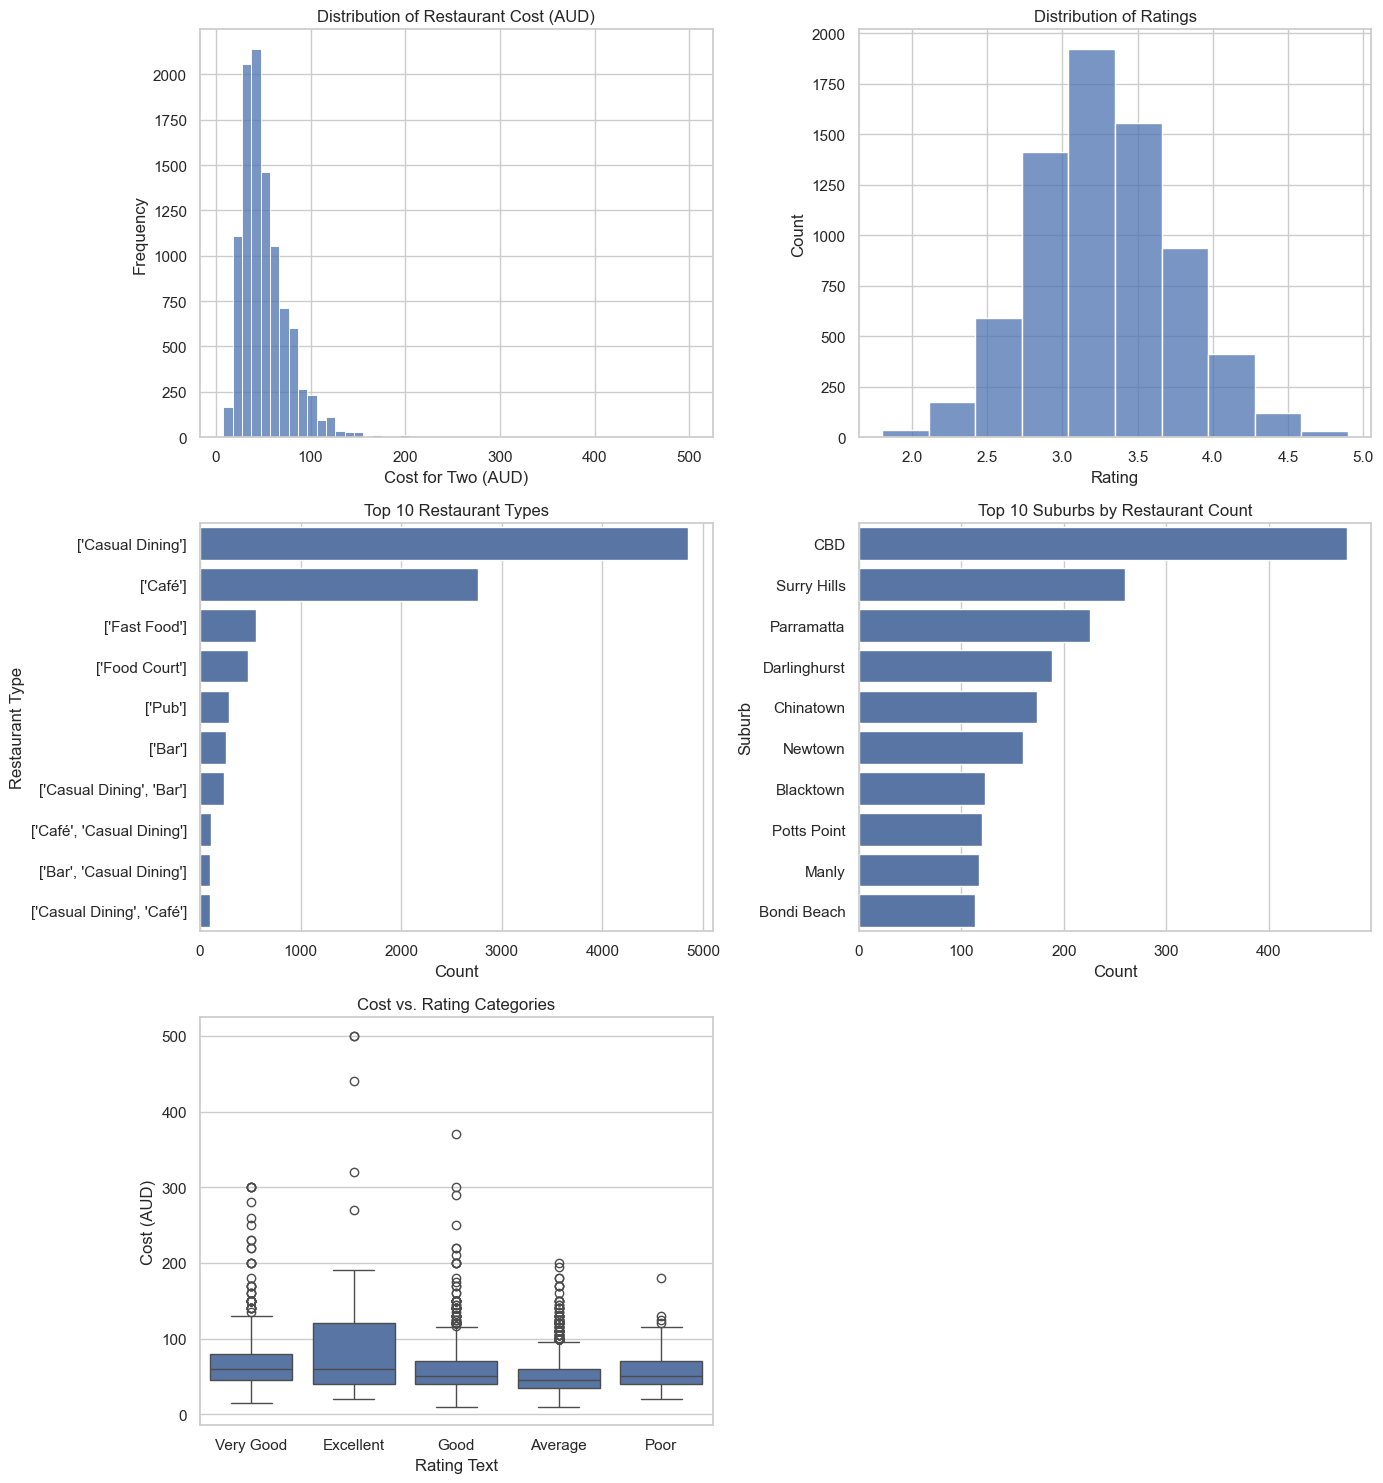

In [6]:
sns.set(style="whitegrid")

# Create subplots (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(14,15))

# 1. Distribution of Cost
sns.histplot(df['cost'], bins=50, ax=axes[0,0])
axes[0,0].set_title("Distribution of Restaurant Cost (AUD)")
axes[0,0].set_xlabel("Cost for Two (AUD)")
axes[0,0].set_ylabel("Frequency")

# 2. Distribution of Ratings
sns.histplot(df['rating_number'], bins=10, kde=False, ax=axes[0,1])
axes[0,1].set_title("Distribution of Ratings")
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("Count")

# 3. Top 10 Restaurant Types
sns.countplot(y=df['type'], order=df['type'].value_counts().index[:10], ax=axes[1,0])
axes[1,0].set_title("Top 10 Restaurant Types")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Restaurant Type")

# 4. Top 10 Suburbs by Restaurant Count
sns.countplot(y=df['subzone'], order=df['subzone'].value_counts().index[:10], ax=axes[1,1])
axes[1,1].set_title("Top 10 Suburbs by Restaurant Count")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Suburb")

# 5. Cost vs. Rating Categories
sns.boxplot(x='rating_text', y='cost', data=df, ax=axes[2,0])
axes[2,0].set_title("Cost vs. Rating Categories")
axes[2,0].set_xlabel("Rating Text")
axes[2,0].set_ylabel("Cost (AUD)")

# 6. Leave room for another graph if needed (or disable for now)
axes[2,1].axis("off")

# Adjust layout
plt.tight_layout()
plt.savefig("../visualisations/eda_visuals.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
df['cuisine'] = df['cuisine'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Flatten the list of cuisines into a single Series
all_cuisines = pd.Series([c.strip() for sublist in df['cuisine'].dropna() for c in sublist])

# Count occurrences
cuisine_counts = all_cuisines.value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']

# Display top of table
print(cuisine_counts.head(20))

# Save to CSV for reference
cuisine_counts.to_csv("../data/cuisine_counts.csv", index=False)

              Cuisine  Count
0                Cafe   3162
1   Modern Australian    981
2             Chinese    863
3             Italian    820
4               Pizza    744
5                Thai    703
6            Japanese    578
7               Asian    536
8              Burger    506
9              Indian    402
10            Seafood    388
11         Vietnamese    361
12              Sushi    335
13           Pub Food    332
14           Bar Food    330
15           Sandwich    320
16     Coffee and Tea    289
17         Australian    269
18             Bakery    234
19       Healthy Food    216


In [8]:
cuisine_counts.shape

(134, 2)

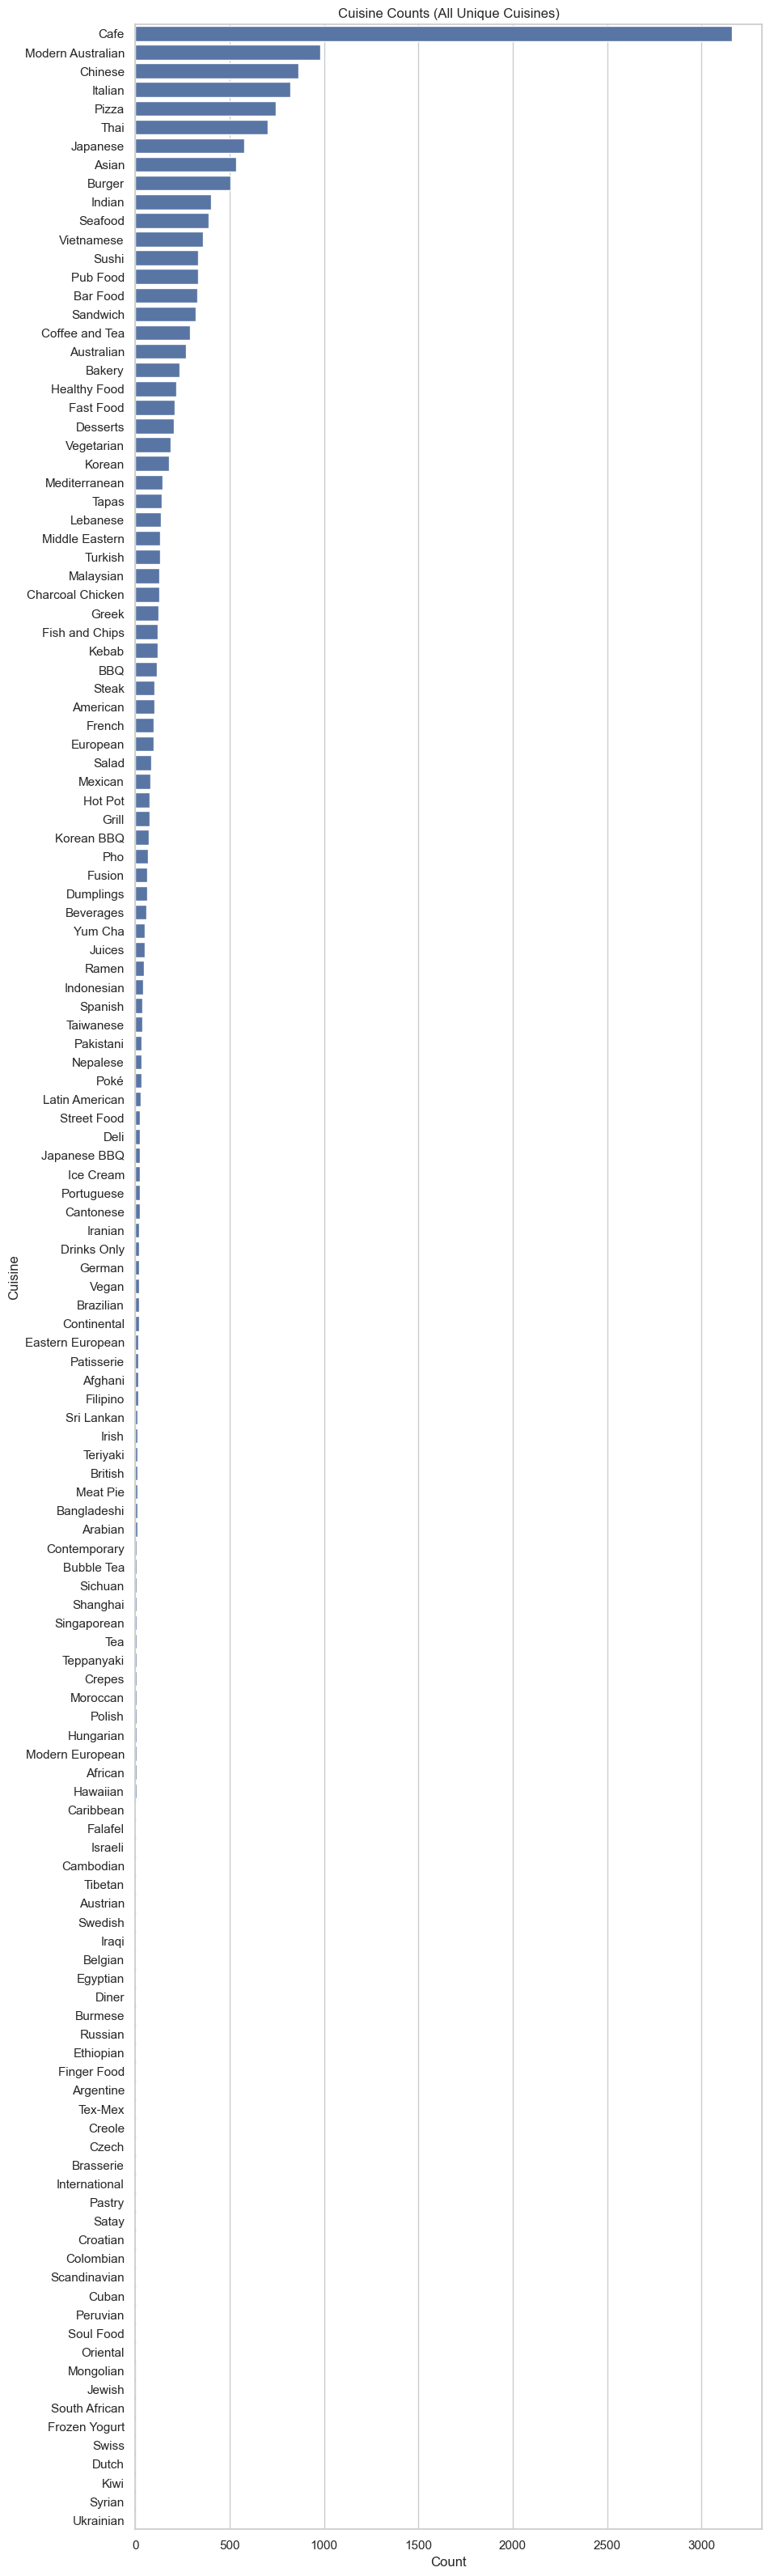

In [9]:
n_cuisines = len(cuisine_counts)
plt.figure(figsize=(10, n_cuisines * 0.3))  # scale height for readability

sns.barplot(
    y=cuisine_counts['Cuisine'],
    x=cuisine_counts['Count']
)

plt.title("Cuisine Counts (All Unique Cuisines)")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

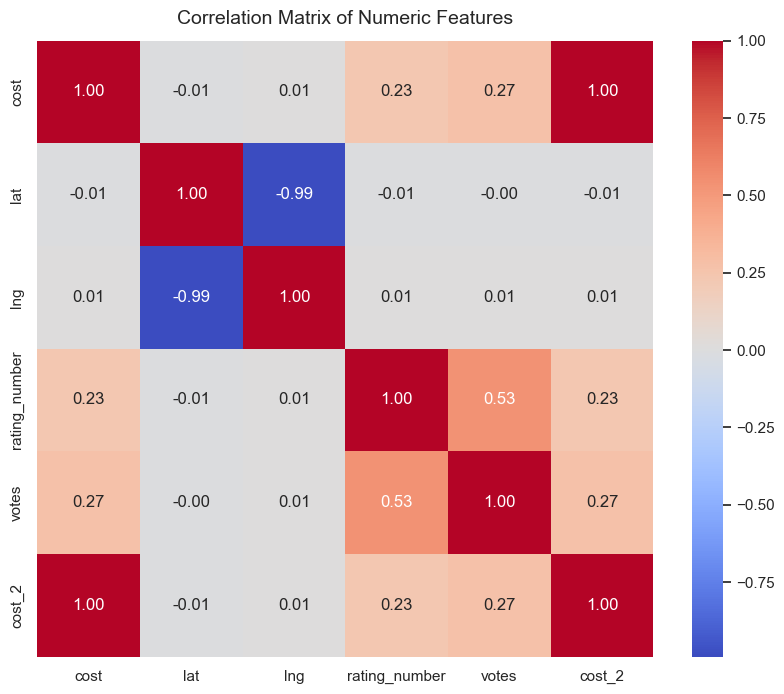

In [17]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64','int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Numeric Features", fontsize=14, pad=12)
plt.savefig("../visualisations/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

The dataset contains a wide variety of food options, with 134 unique cuisines represented across restaurants. This highlights the diversity of dining experiences available.

When examining location, three suburbs stand out as having the highest restaurant density: Sydney CBD, Surry Hills, and Parramatta. These areas are known as major business, cultural, and residential hubs, which explains their concentration of restaurants.

Finally, in terms of cost by rating category, the boxplot of restaurant cost against rating_text suggests that restaurants with “Excellent” ratings generally have higher costs compared to those with “Poor” ratings. The “Excellent” restaurants spread extends further into higher price ranges, while “Poor” and “Average” ratings are associated with lower, more tightly clustered costs. This supports the expectation that higher-rated restaurants often charge more, reflecting both perceived quality and demand.

The distribution of restaurant costs shows that the majority of venues fall within the lower price ranges, with a sharp peak around 20–60 AUD for two people. Only a small number of restaurants extend into the higher cost brackets, reaching up to 500 AUD. Ratings, on the other hand, are concentrated around the middle of the scale, with most values between 2.5 and 3.5, and relatively few restaurants rated at the extremes. This narrow spread suggests limited variation in ratings across restaurants. Restaurant type distribution reveals that a small set of categories dominate the market: “Casual Dining” and “Café” account for the vast majority of listings, while other types such as “Fast Food,” “Food Court,” “Pub,” and mixed-type venues are far less common.

The correlation matrix indicates a moderate positive correlation between cost and votes (0.27), and a stronger relationship between ratings and votes (0.53). This suggests that restaurants with more votes tend to have slightly higher costs, and more importantly, higher ratings are generally associated with increased customer engagement.

A few interesting patterns emerge. First, lat and lng are almost perfectly negatively correlated (–0.99), reflecting the geographic structure of the dataset. Second, cost and its engineered version cost_2 are perfectly correlated, as expected. Third, while the correlation between cost and ratings is positive (0.23), it is relatively weak, suggesting that higher-rated restaurants are not necessarily much more expensive on average, though some upward trend exists. Collectively, these findings highlight that customer engagement (measured by votes) is more strongly tied to ratings than to price, and that while high-cost restaurants exist, most venues remain affordable and highly concentrated in a few key restaurant types.

## 4. Geospatial Analysis

In [11]:
geo = gpd.read_file('../data/sydney.geojson')
display(geo.head())

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
2,10010,Acacia Gardens,Very good,0.946630,"POLYGON ((150.90781 -33.73547, 150.90799 -33.7..."
3,10016,Airds,Very good,2.380773,"POLYGON ((150.84 -34.07817, 150.84077 -34.078,..."
4,10022,Alexandria,Very good,3.503330,"POLYGON ((151.18603 -33.9166, 151.18562 -33.91..."


In [12]:
print(df['subzone'].head())

0                                      CBD
1    The Grounds of Alexandria, Alexandria
2                        The Star, Pyrmont
3                            Circular Quay
4                                Chinatown
Name: subzone, dtype: object


In [13]:
# Count restaurants per suburb
suburb_counts = df.groupby('subzone').size().reset_index(name='restaurant_count')

# Merge with geospatial data
geo = geo.merge(suburb_counts, how='left', left_on='SSC_NAME', right_on='subzone')

# Fill missing with 0 (suburbs with no restaurants in dataset)
geo['restaurant_count'] = geo['restaurant_count'].fillna(0)

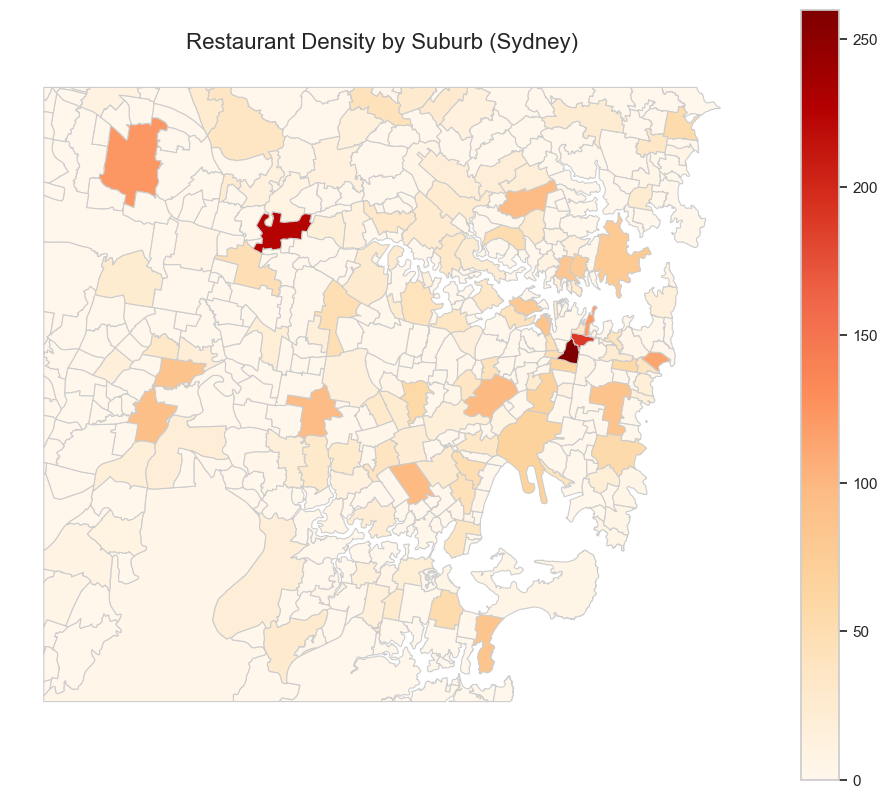

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))

geo.plot(
    column='restaurant_count',
    cmap='OrRd',    # Orange-Red color scale
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

ax.set_title("Restaurant Density by Suburb (Sydney)", fontsize=16)
ax.axis("off")
plt.show()

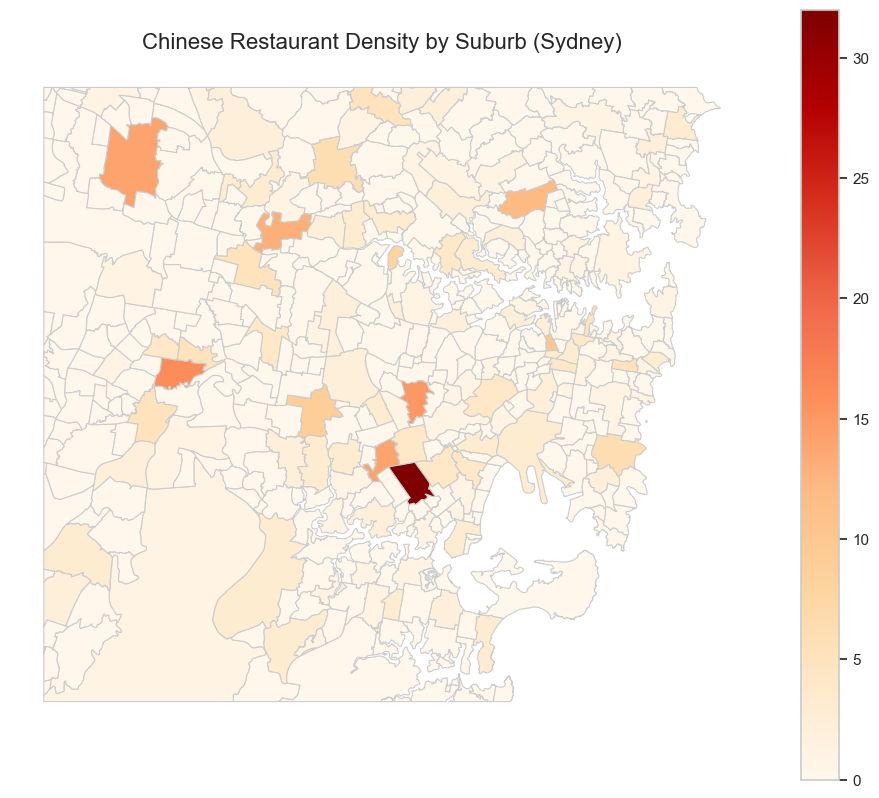

In [15]:
# Filter restaurants containing "Chinese"
df['is_chinese'] = df['cuisine'].apply(lambda x: 'Chinese' in str(x))

indian_counts = df[df['is_chinese']].groupby('subzone').size().reset_index(name='chinese_count')

# Merge into geo dataframe
geo_indian = geo.merge(indian_counts, how='left', left_on='SSC_NAME', right_on='subzone')
geo_indian['chinese_count'] = geo_indian['chinese_count'].fillna(0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12,10))
geo_indian.plot(
    column='chinese_count',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title("Chinese Restaurant Density by Suburb (Sydney)", fontsize=16)
ax.axis("off")
plt.show()

## 5. Interactive Visualisation

In [16]:
import plotly.express as px

# Interactive histogram of restaurant costs
fig = px.histogram(
    df, 
    x="cost", 
    nbins=50, 
    title="Interactive Distribution of Restaurant Cost (AUD)",
    labels={"cost": "Cost for Two (AUD)", "count": "Frequency"},
    opacity=0.75
)

fig.update_traces(marker_color="steelblue")
fig.update_layout(
    bargap=0.05,
    xaxis=dict(title="Cost for Two (AUD)", range=[0, 500]),
    yaxis=dict(title="Frequency"),
    hovermode="x unified"
)

# Export to standalone HTML file
fig.write_html("../visualisations/restaurant_cost_distribution.html")

The interactive version of the restaurant cost distribution provides several advantages over a static histogram. First, it allows users to zoom and pan across the cost axis, which is particularly useful because most restaurants cluster between 20 and 60 AUD, while a small number extend up to 500 AUD. In a static plot, these outliers compress the main distribution, but with interactivity, users can focus on the dense regions without losing sight of the broader spread.

Second, interactive features such as hover tooltips make it easy to inspect the exact frequency within each bin, giving a more precise view of the distribution than simple visual estimation. Third, by adjusting the number of bins dynamically, the user can explore the data at different levels of granularity — for example, using wider bins to see overall trends or narrower bins to examine fine details.

Overall, interactivity transforms the histogram from a static summary into an exploratory tool, enabling both a high-level overview and deeper investigation of restaurant cost patterns.